# **Optimizing Surgical Scheduling: A Data-Driven Approach**

## **Project Content** <a id = 0></a>

### First Step: First Organization

1. [Introduction](#1)
2. [Load The Relevant Libraries and Packages](#2)

### Second Step: Data Preprocessing

3. [Load and Preprocess The Dataset](#3)

### Third Step: Data Analysis

4. [Check out the Statistics of the Categorical and the Numeric Features of The Dataset](#4)
5. [Check out the Relation between the Glucose Tests (FPG and 2hrPG) to Evaluate the BMI and HbA1c Features](#5)
6. [Check out the Relation between the Age and Total Glucose to Evaluate the Diabetes Status](#6)

### Forth and Final Step: Modeling and Examination

7. [Factorize the Categorical Features](#7)
8. [Split the Dataset into the Train and Test Sets and then Create a Vector of the Input and Output Variables](#8)
9. [Define the Logistic Regression Model and Check Its Performance](#9)
10. [Define the CARET Model and Check its Performance](#10)
11. [Define the Random Forest Model and Check Its Performance](#10)

***

# First Step: First Organization

***

## 1. Introduction <a id = 1></a>

### **Problem Explanation**

<div style="text-align: justify">
The escalating prevalence of prediabetes (preDM) and diabetes mellitus (DM) among youth, coupled with the underdiagnosis of these conditions, underscores a critical need for robust and accessible screening tools. Existing pediatric clinical screening guidelines, including those endorsed by the American Diabetes Association (ADA) and the American Academy of Pediatrics (AAP), reveal limitations in accurately identifying youth with preDM/DM based on biomarker criteria. The variations in guideline performance across demographic subgroups, such as age, sex, and race/ethnicity, further complicate the identification of high-risk populations.
</div>
</br>
<div style="text-align: justify">
Addressing these limitations, the study advocates for the development of an advanced, data-driven screening tool using machine learning (ML) methods, encompassing a broader spectrum of clinical and behavioral health data. This tool aims to overcome the current deficiencies and accurately identify youth at risk for preDM/DM, acknowledging the multifaceted factors influencing diabetes risk beyond weight status. The overarching goal is to create a comprehensive and inclusive screener, ensuring widespread implementation to identify at-risk youth and guide them toward tailored preventive interventions.
</div>

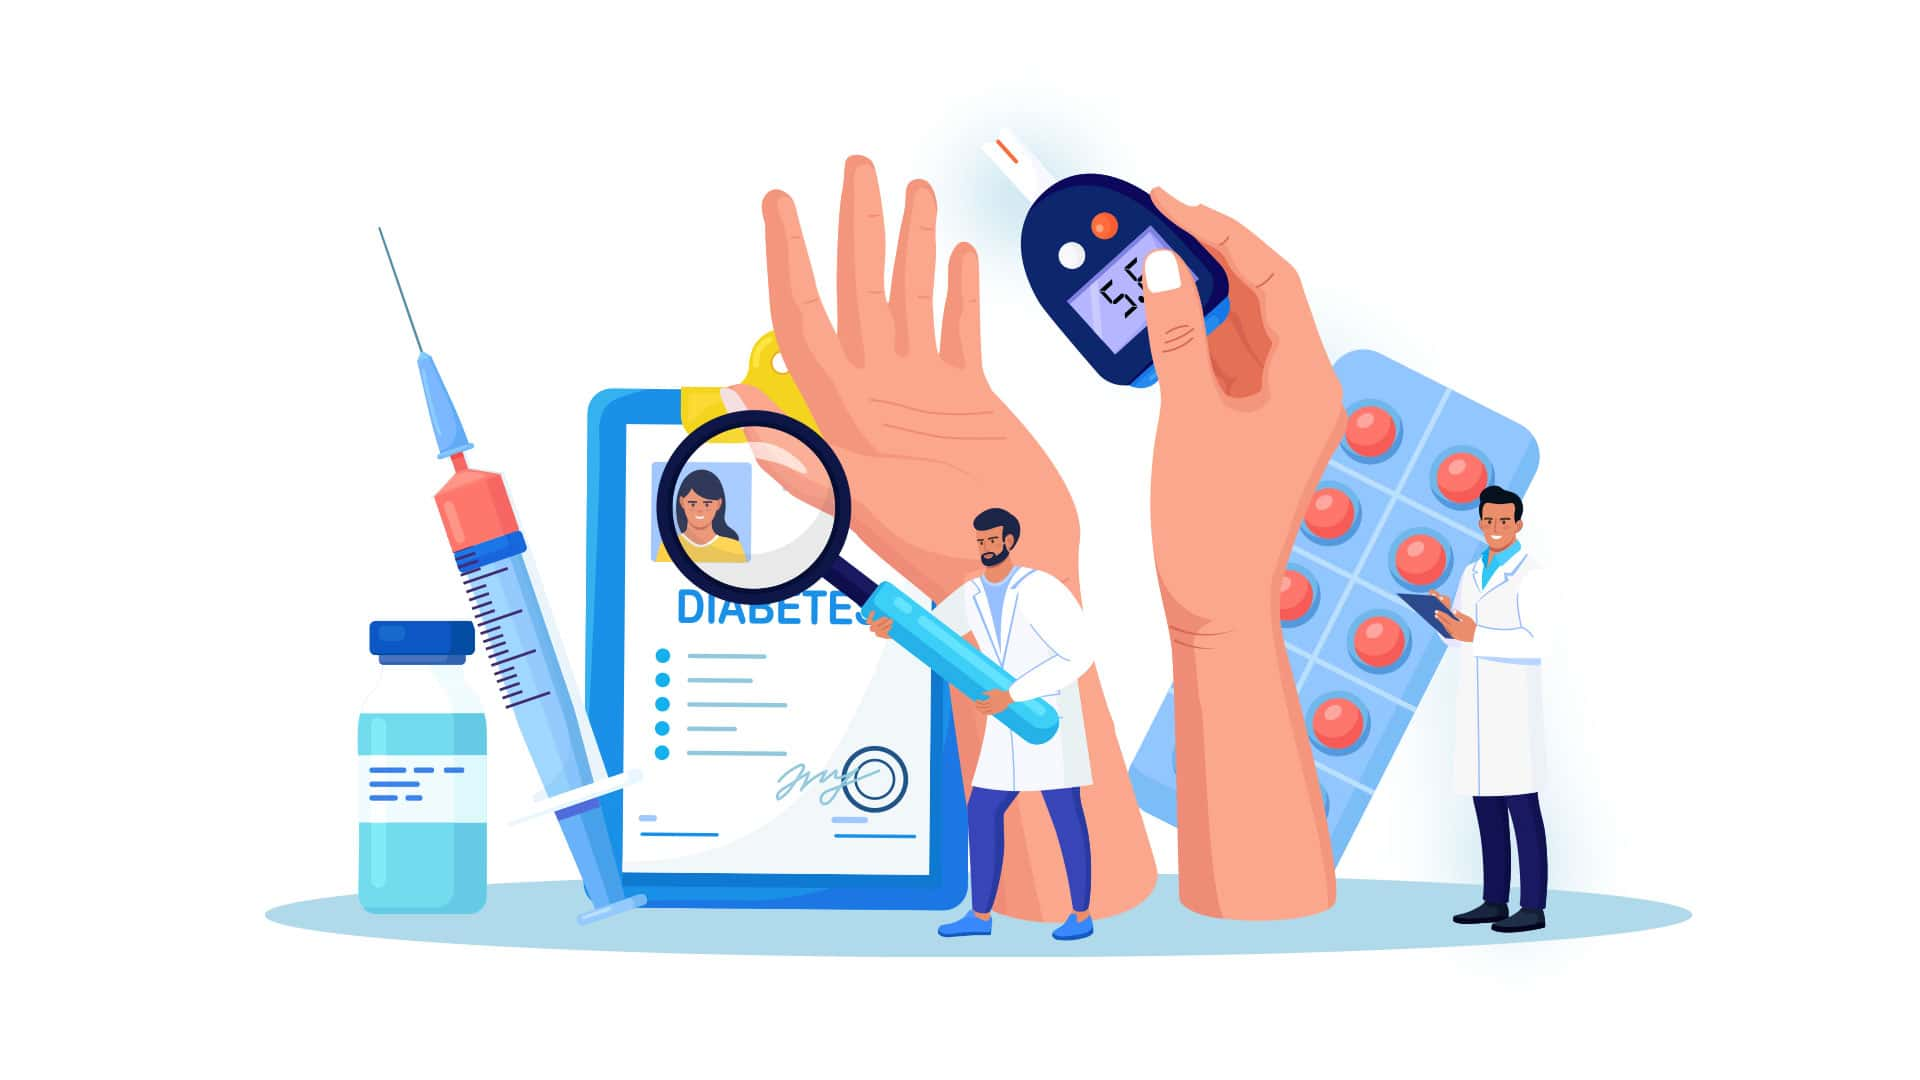

[Project Content](#0)

## 2. Load The Relevant Libraries and Packages <a id = 2></a>

In [1]:
# Data manipulation and transformation
library(tidymodels)   # Tidy modeling framework
library(magrittr)

# Data visualization
library(ggplot2)      # Comprehensive plotting library

# Machine learning and predictive modeling
library(caTools)      # Tools for classification and regression tasks
library(caret)        # Comprehensive machine learning toolkit
library(rpart)        # Recursive Partitioning for decision trees
library(rpart.plot)   # Plotting trees from rpart
library(randomForest) # Random Forest for classification and regression tasks
library(dplyr) # Random Forest for classification and regression tasks

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.8
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


The following object is masked from ‘package:purrr’:

    set_names


Loading required package: lattice


Attaching package: ‘caret’


The following o

[Project Content](#0)

***

# Second Step: Data Preprocessing

***

## 3. Load and Preprocess the Dataset <a id = 3></a>

In [2]:
# Read the Earning.csv file into a data frame.
df <- read.csv("./Datasets/final_dataset.csv")

# Print the dimensions of the dataset.
cat("The final dataset that has been gathered has the shape of:", dim(df), "\n")

# Display the first few rows of the dataset.
head(df, 5)

The final dataset that has been gathered has the shape of: 2730 16 


,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,31133,2,16,2,16.79,120,58,84,122,4.7,147,2,3.63,0,0,0
2,31148,2,16,1,18.28,106,42,91,69,5.0,126,2,11.17,0,0,0
3,31206,2,17,4,21.27,110,66,93,82,4.7,180,1,37.62,0,0,0
4,31211,2,17,1,23.27,108,72,79,96,5.4,178,2,54.30,0,0,0
5,31237,1,12,3,32.01,120,50,103,111,4.9,175,1,89.14,0,1,1


Check out if the dataset contains any missing values.

In [3]:
# Function to calculate the percentage of non-missing values.
percentage_non_missing <- function(x) {
  mean(!is.na(x)) * 100
}

# Apply the function to each column in the dataframe.
non_missing_percentages <- sapply(df, percentage_non_missing)

# Create a new dataframe to store the results without row names.
result_df <- data.frame(
  Feature=names(df),
  Non_Missing_Percentage=non_missing_percentages,
  row.names=NULL
)

# Print the results.
result_df

Feature,Non_Missing_Percentage
<chr>,<dbl>
ID,100
Gender,100
Age,100
Race,100
BMI,100
Systolic.BP,100
Diastolic.BP,100
FPG,100
X2hrPG,100


There is no missing values in the current dataset.

[Project Content](#0)

***

# Third Step: Exploratory Data Analysis

***

## 4. Check out the Statistics of the Categorical and the Numeric Features of The Dataset <a id = 4></a>

Firstly, extract the features names from the df.

In [4]:
features <- names(df)

features

[1] "ID"                  "Gender"              "Age"                
 [4] "Race"                "BMI"                 "Systolic.BP"        
 [7] "Diastolic.BP"        "FPG"                 "X2hrPG"             
[10] "HbA1c"               "Total.Cholestrol"    "Diabetes.Risk"      
[13] "BMI.Percentile"      "Hypertension"        "ADA.Biomarker.Label"
[16] "ADA.Screening.Label"

Now, create two lists of categorical and numeric features.

In [5]:
cat_features <- c("Gender", "Race", "Diabetes.Risk", "Hypertension", "ADA.Biomarker.Label", "ADA.Screening.Label")
num_features <- setdiff(features, cat_features)
num_features <- num_features[num_features != "ID"]

cat("Categorical features:")
cat("\n")
cat(cat_features)

cat("\n\n")

cat("Numeric features:")
cat("\n")
cat(num_features)

Categorical features:
Gender Race Diabetes.Risk Hypertension ADA.Biomarker.Label ADA.Screening.Label

Numeric features:
Age BMI Systolic.BP Diastolic.BP FPG X2hrPG HbA1c Total.Cholestrol BMI.Percentile

It Seems well. Now it's the time to check out the values of both the categorical and numeric features.

In [6]:
cat_summary_table <- function(dataframe, categorical_features) {
  
  # Create an empty data frame to store the results
  summary_table <- data.frame(
    Feature=character(),
    Unique_Values=character(),
    Percentage=numeric(),
    stringsAsFactors=FALSE
  )
  
  # Loop through each specified feature
  for (feature in categorical_features) {
    # Extract unique values and their counts for the current feature
    value_counts <- table(dataframe[[feature]])
    
    # Calculate percentages
    percentages <- round(prop.table(value_counts) * 100, 0)
    
    # Append information to the table data frame
    summary_table <- rbind(summary_table, data.frame(
      Feature=rep(feature, length(value_counts)),
      Unique_Values=as.character(names(value_counts)),
      Percentage=as.numeric(percentages)
    ))
  }

  feature_feature <- c(summary_table$Feature)
  feature_feature[duplicated(feature_feature)] <- ""
  summary_table$Feature <- feature_feature

  # Print the resulting table
  return(summary_table)
}

summary_table <- cat_summary_table(df, cat_features)

summary_table

Feature,Unique_Values,Percentage
<chr>,<chr>,<dbl>
Gender,1,53
,2,47
Race,1,28
,2,26
,3,37
,4,9
Diabetes.Risk,1,11
,2,89
Hypertension,0,99


Based on the infromation above, we can understand the distribution of the dataset based on its features.</br>
The most important statistics of these features are also shown in the table.

In [7]:
num_summary_table <- function(dataframe, numeric_features) {

  # Extract the numeric columns from the dataframe
  numeric_data <- dataframe[numeric_features]

  # Compute summary statistics
  summary_stats <- data.frame(
    Feature=character(),
    Min=numeric(),
    Q1=numeric(),
    Mean=numeric(),
    Median=numeric(),
    Q3=numeric(),
    Max=numeric(),
    stringsAsFactors=FALSE
  )

  for (feature in numeric_features) {
    summary_stats <- rbind(
      summary_stats,
      c(
        Feature=feature,
        Min=round(min(numeric_data[[feature]], na.rm = TRUE), 2),
        Q1=round(quantile(numeric_data[[feature]], 0.25, na.rm = TRUE), 2),
        Mean=round(mean(numeric_data[[feature]], na.rm = TRUE), 2),
        Median=round(median(numeric_data[[feature]], na.rm = TRUE), 2),
        Q3=round(quantile(numeric_data[[feature]], 0.75, na.rm = TRUE), 2),
        Max=round(max(numeric_data[[feature]], na.rm = TRUE), 2)
      )
    )
  }

  # Set the column names for the summary dataframe
  colnames(summary_stats) <- c("Feature", "Min", "Q1", "Mean", "Median", "Q3", "Max")

  return(summary_stats)
}

summary_table <- num_summary_table(df, num_features)

summary_table

Feature,Min,Q1,Mean,Median,Q3,Max
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Age,12,14,15.47,15,17,19
BMI,13.3,19.9,24.25,22.64,27.2,68.6
Systolic.BP,76,104,110.58,110,118,154
Diastolic.BP,0,52,59.05,60,66,96
FPG,61,89,94.28,94,99,254
X2hrPG,31,82,97.94,96,110,222
HbA1c,4,5,5.21,5.2,5.4,9.5
Total.Cholestrol,66,136,156.77,154,174,332
BMI.Percentile,0.04,25.15,50.02,50.01,75.07,100


Since the minium Diastolic Blood Pressure can not be less than 4, omitting the records with less than this value is recommended.

In [10]:
df <- df[df$Diastolic.BP >= 4,]

Let's check the statistics of the numeric features again.

In [11]:
num_summary_table <- function(dataframe, numeric_features) {

  # Extract the numeric columns from the dataframe
  numeric_data <- dataframe[numeric_features]

  # Compute summary statistics
  summary_stats <- data.frame(
    Feature=character(),
    Min=numeric(),
    Q1=numeric(),
    Mean=numeric(),
    Median=numeric(),
    Q3=numeric(),
    Max=numeric(),
    stringsAsFactors=FALSE
  )

  for (feature in numeric_features) {
    summary_stats <- rbind(
      summary_stats,
      c(
        Feature = feature,
        Min = round(min(numeric_data[[feature]], na.rm = TRUE), 2),
        Q1 = round(quantile(numeric_data[[feature]], 0.25, na.rm = TRUE), 2),
        Mean = round(mean(numeric_data[[feature]], na.rm = TRUE), 2),
        Median = round(median(numeric_data[[feature]], na.rm = TRUE), 2),
        Q3 = round(quantile(numeric_data[[feature]], 0.75, na.rm = TRUE), 2),
        Max = round(max(numeric_data[[feature]], na.rm = TRUE), 2)
      )
    )
  }

  # Set the column names for the summary dataframe
  colnames(summary_stats) <- c("Feature", "Min", "Q1", "Mean", "Median", "Q3", "Max")

  return(summary_stats)
}

summary_table <- num_summary_table(df, num_features)

summary_table

Feature,Min,Q1,Mean,Median,Q3,Max
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Age,12,14,15.49,16,17,19
BMI,13.3,19.9,24.27,22.69,27.2,68.6
Systolic.BP,76,104,110.6,110,118,154
Diastolic.BP,12,52,59.71,60,68,96
FPG,61,89,94.27,94,99,254
X2hrPG,31,82,97.82,96,110,222
HbA1c,4,5,5.21,5.2,5.4,9.5
Total.Cholestrol,66,136,156.74,154,174,320
BMI.Percentile,0.04,25.15,50.15,50.38,75.07,100


## 5. Check out the Relation between the Glucose Tests (FPG and 2hrPG) to Evaluate the BMI and HbA1c Features <a id = 5></a>

In order to get better insights from the data, plot the datapoints Glucose tests showing the HbA1c and BMI features.

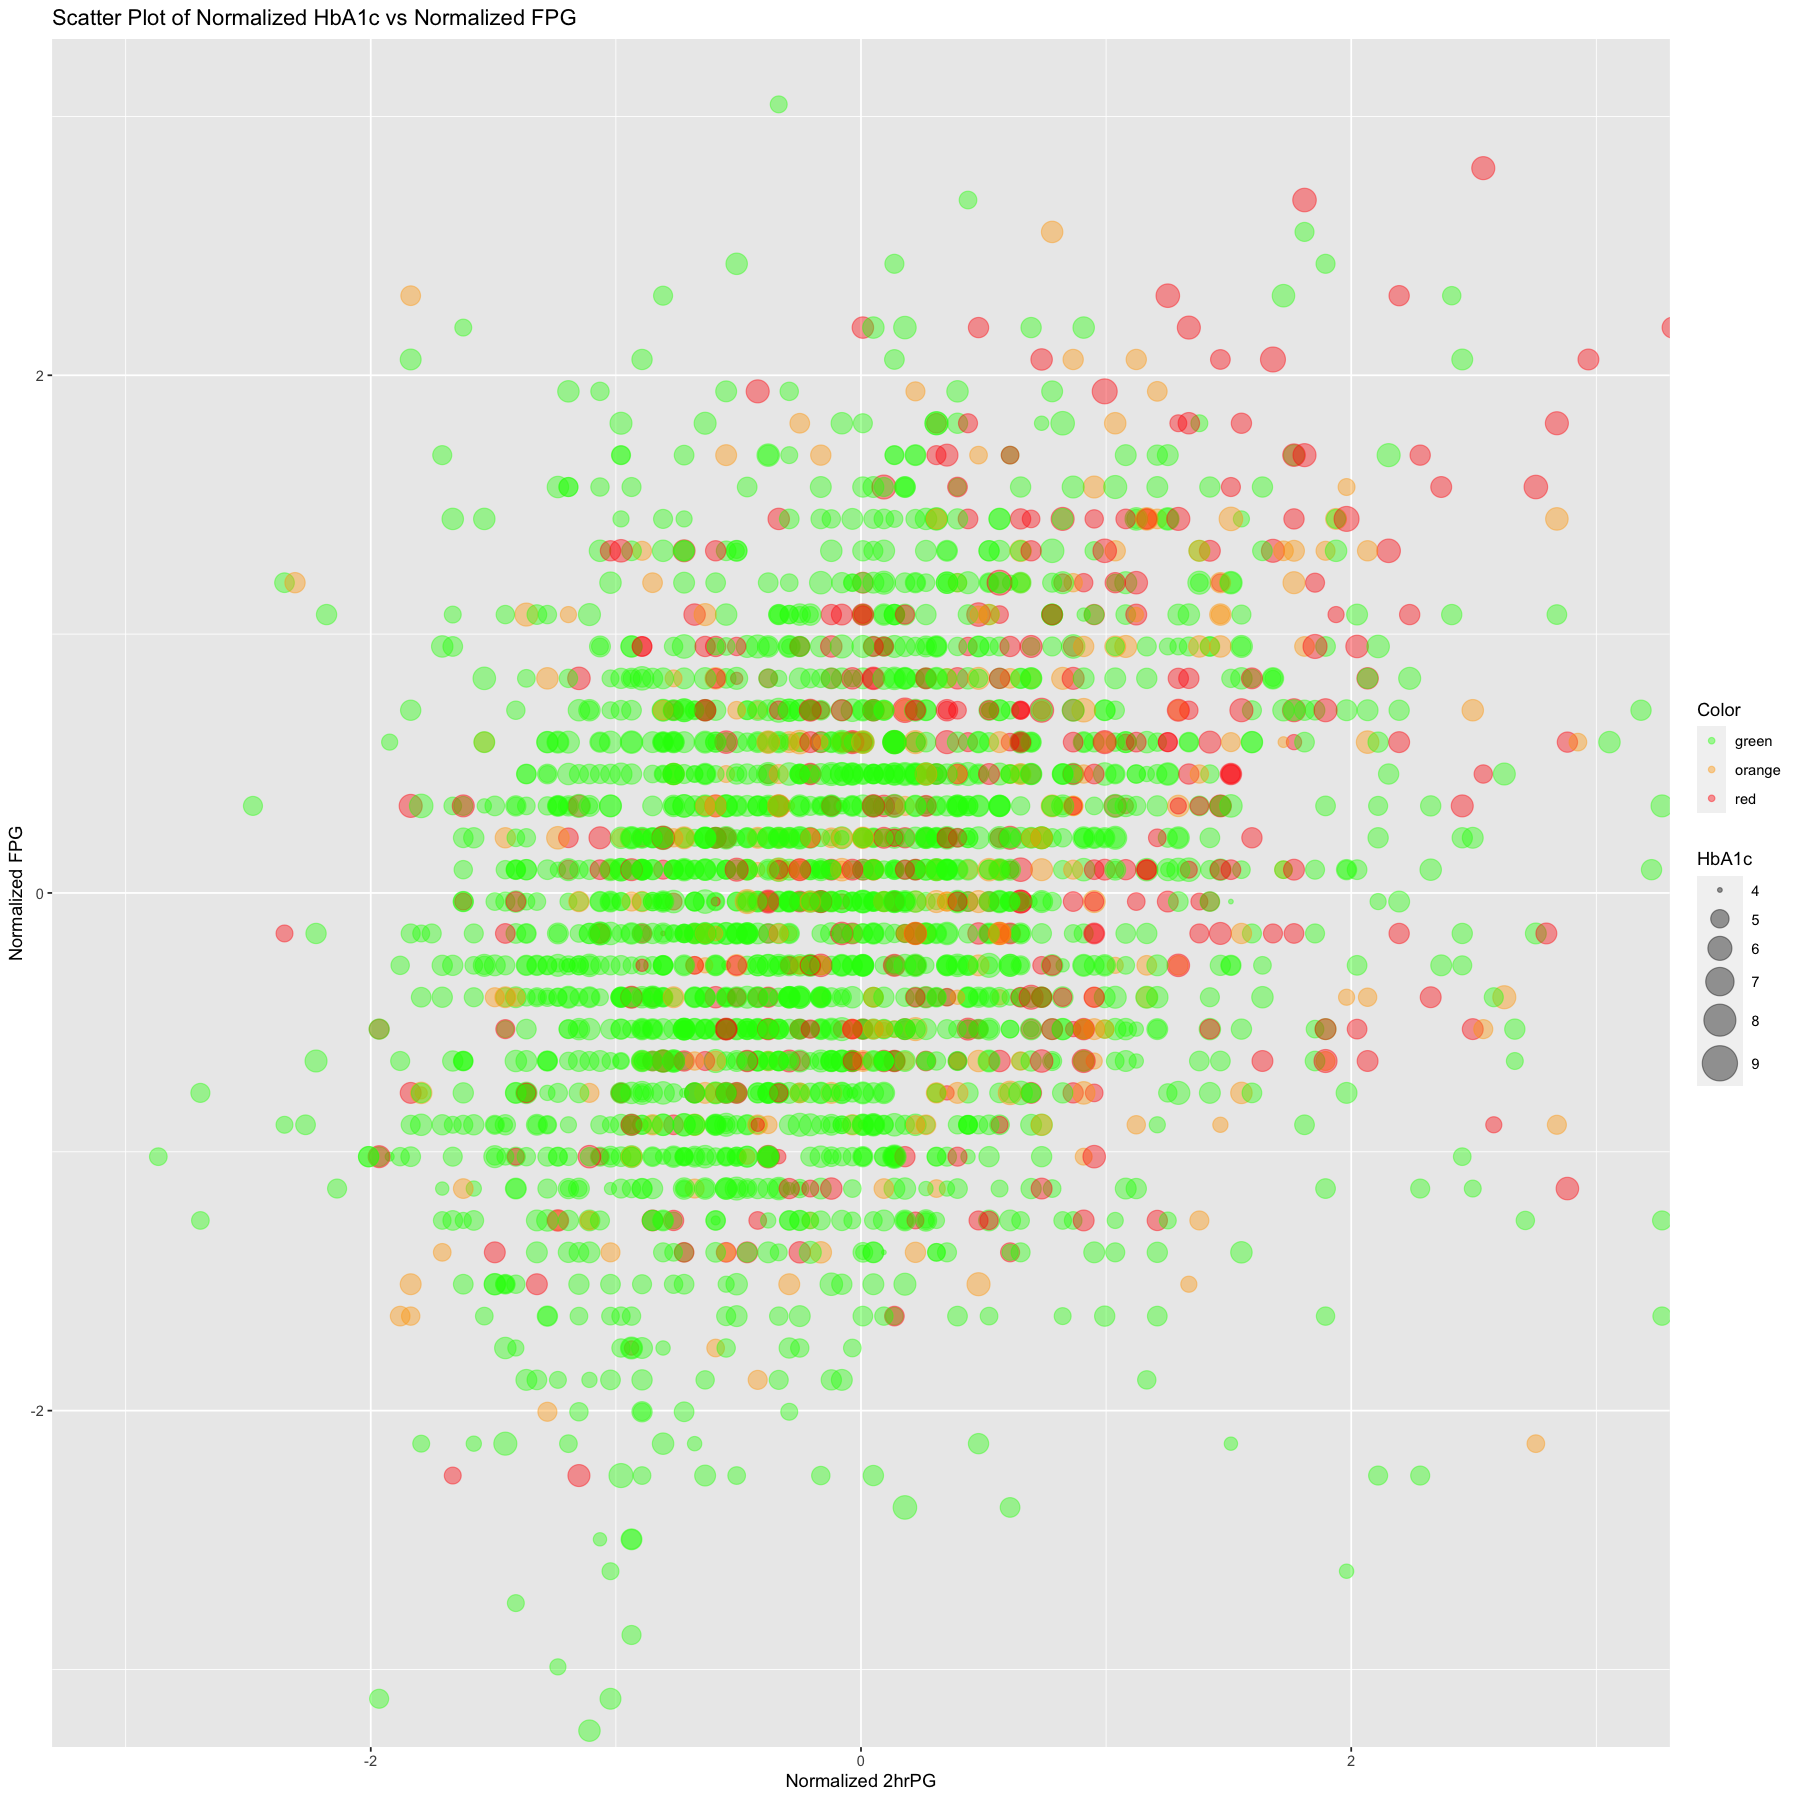

In [12]:
# Set the options for the plot size.
options(
  repr.plot.width=15,
  repr.plot.height=15)

# Create a new column 'Color' based on BMI.Percentile
df$Color <- cut(df$BMI.Percentile, breaks=c(-Inf, 75, 85, Inf),
                       labels=c("green", "orange", "red"))

# Scatter plot with normalized values and limited axis range
ggplot(df, aes(x=scale(X2hrPG), y=scale(FPG), color=Color, size=HbA1c)) +
  
  geom_point(alpha=0.4) +
  
  scale_color_manual(values=c("green", "orange", "red")) +
  scale_size_continuous(range=c(1, 10)) +
  
  labs(title = "Scatter Plot of Normalized HbA1c vs Normalized FPG",
       x="Normalized 2hrPG",
       y="Normalized FPG") +
  
  coord_cartesian(xlim=c(-3, 3), ylim=c(-3, 3))

df <- subset(df, select=-Color)

## 6. Check out the Relation between the Age and Total Glucose to Evaluate the Diabetes Status  <a id = 6></a>

In order to get better insights from the data, plot the datapoints Total Cholestrol values based vs. the Age showing their Diabetes status.

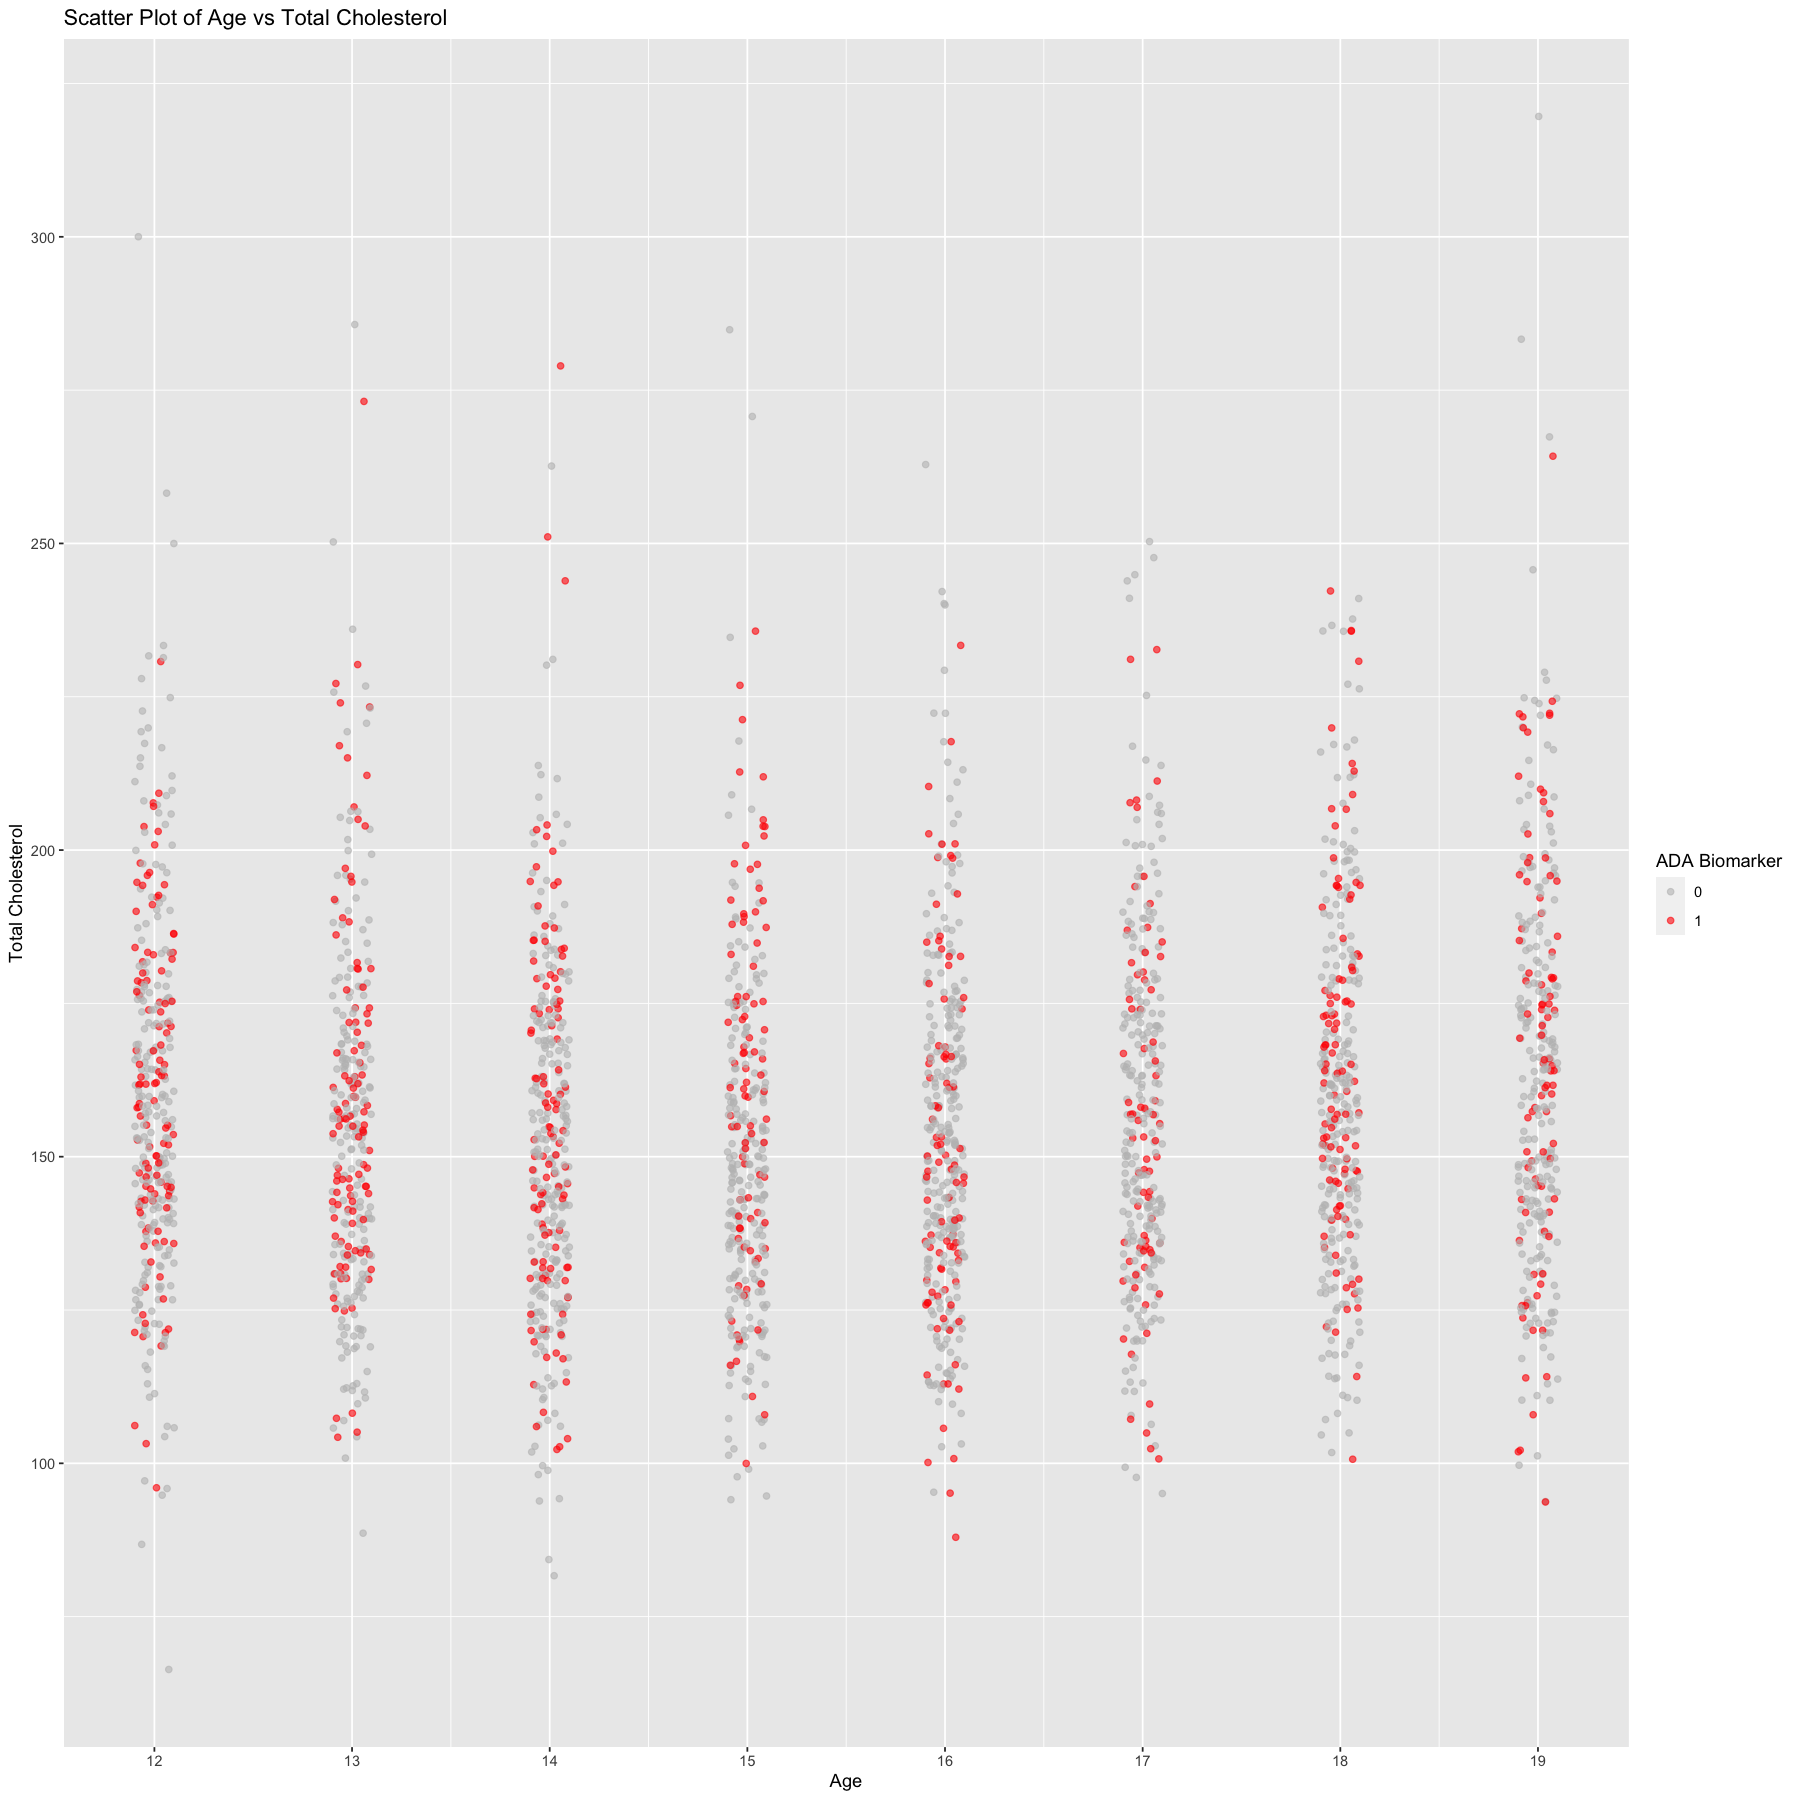

In [13]:
# Create a scatter plot using ggplot with color based on ADA Biomarker and less jitter
ggplot(df, aes(x=Age, y=Total.Cholestrol, color=factor(ADA.Biomarker.Label))) +
  geom_jitter(alpha=0.6, width=0.1) +  # Adjust width for less jitter
  scale_color_manual(values = c("0"="grey", "1"="red")) +  # Set colors for ADA Biomarker values
  labs(title="Scatter Plot of Age vs Total Cholesterol",
       x="Age",
       y="Total Cholesterol",
       color="ADA Biomarker") +  # Legend title for color scale
  scale_x_continuous(breaks=unique(df$Age))  # Show all ages on the x-axis

[Project Content](#0)

***

# Fourth and Final Step: Modeling and Examination

***

## 7. Factorize the Categorical Features <a id = 7></a>

In order to get free from defining the features types in the classification models, factorize the categorical features.

In [14]:
for (feature in cat_features) {
    df[[feature]] <- factor(df[[feature]])
}

In order to get sure about the dataset fatures data types, create a table of them.

In [15]:
# Create a data frame with column names and data types
dtypes_df <- data.frame(
  Feature=names(df),
  Data_Type=sapply(df, class),
  row.names=NULL
)

# Display the data frame
dtypes_df

Feature,Data_Type
<chr>,<chr>
ID,numeric
Gender,factor
Age,integer
Race,factor
BMI,numeric
Systolic.BP,numeric
Diastolic.BP,numeric
FPG,numeric
X2hrPG,numeric


## 8. Split the Dataset into the Train and Test Sets and then Create a Vector of the Input and Output Variables <a id = 8></a>

Split the dataset to the train and test sets.

In [16]:
# Set a seed for reproducibility.
set.seed(123)

# Split the dataset into training and testing sets based on the ADA Biomarker Label.
split <- sample.split(df$ADA.Biomarker.Label, SplitRatio=0.8)

# Create the train set by subsetting rows where the split is TRUE.
train_set <- subset(df, split == TRUE)

# Create the test set by subsetting rows where the split is FALSE.
test_set <- subset(df, split == FALSE)

# Display the dimensions (number of rows and columns) of the train and test sets.
cat("Train set shape equals to:", dim(train_set), "\n")
cat("Test set shape equals to: ", dim(test_set))

Train set shape equals to: 2160 16 
Test set shape equals to:  540 16

Now, create a vector containing the ML models' arguments.

In [17]:
variables <- c("Race", "Total.Cholestrol", "Diabetes.Risk", 
               "BMI.Percentile", "Hypertension", "ADA.Biomarker.Label")

head(df[,variables], 5)

,Race,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label
,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
1,2,147,2,3.63,0,0
2,1,126,2,11.17,0,0
3,4,180,1,37.62,0,0
4,1,178,2,54.30,0,0
5,3,175,1,89.14,0,1


## 9. Define the Logistic Regression Model and Check Its Performance <a id = 9></a>

Firstly, define the threshold based on the base model.

In [18]:
threshold <- round((dim(subset(train_set, ADA.Biomarker.Label == 1))[1] / dim(train_set)[1]), 2)

threshold

[1] 0.29

Fit the Logistic Regression model on the train set.</br>

In [19]:
# Train a logistic regression model
lr_model <- logistic_reg(
  mixture=double(1),
  penalty=double(1),
  ) %>%

  set_engine("glmnet") %>%

  set_mode("classification") %>%

  fit(
    ADA.Biomarker.Label ~ .,
    data=train_set[,variables])

# Model summary
tidy(lr_model)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),-2.163007720,0
Race2,0.112577709,0
Race3,0.288890043,0
Race4,0.244748350,0
Total.Cholestrol,0.004197669,0
Diabetes.Risk2,0.052056883,0
BMI.Percentile,0.007531209,0
Hypertension1,0.440086059,0


Predict the train set labels probabilities to be Diabetic.

In [20]:
# Class Predictions
train_predictions <- predict(lr_model,
                      new_data=train_set[,variables],
                      type="prob")

head(train_predictions, 5)

.pred_0,.pred_1
<dbl>,<dbl>
0.7947791,0.2052209
0.8172642,0.1827358
0.7066885,0.2933115
0.6149561,0.3850439
0.7557061,0.2442939


Fill the the Logistic Regression prediction feature on the train set based on the threshold defined before.

In [21]:
# Convert predicted probabilities to class predictions (binary outcome: "Yes" or "No").
train_predictions <- ifelse(train_predictions[,2] > threshold, 1, 0)

# Add the predicted classes to the training set as a new column "LogReg_Pred".
train_set["LogReg_Pred"] = train_predictions

head(train_set, 5)

,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label,LogReg_Pred
,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>"
1,31133,2,16,2,16.79,120,58,84,122,4.7,147,2,3.63,0,0,0,0
2,31148,2,16,1,18.28,106,42,91,69,5.0,126,2,11.17,0,0,0,0
3,31206,2,17,4,21.27,110,66,93,82,4.7,180,1,37.62,0,0,0,1
5,31237,1,12,3,32.01,120,50,103,111,4.9,175,1,89.14,0,1,1,1
7,31264,1,17,4,20.46,102,66,84,67,5.4,122,2,29.85,0,0,0,0


Check how the Logistic Regression model works on the train set.

In [22]:
# Create a confusion matrix.
conf_matrix <- confusionMatrix(
    factor(train_set$LogReg_Pred),
    train_set$ADA.Biomarker.Label,
    positive="1"
)

# Display the confusion matrix.
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 853 284
         1 680 343
                                          
               Accuracy : 0.5537          
                 95% CI : (0.5324, 0.5748)
    No Information Rate : 0.7097          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0872          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.5470          
            Specificity : 0.5564          
         Pos Pred Value : 0.3353          
         Neg Pred Value : 0.7502          
             Prevalence : 0.2903          
         Detection Rate : 0.1588          
   Detection Prevalence : 0.4736          
      Balanced Accuracy : 0.5517          
                                          
       'Positive' Class : 1               
                              

Predict test set labels probabilities to be Diabetic.

In [23]:
# Class Predictions
test_predictions <- predict(lr_model,
                      new_data=test_set[,variables],
                      type="prob")

head(test_predictions, 5)

.pred_0,.pred_1
<dbl>,<dbl>
0.7220837,0.2779163
0.6881901,0.3118099
0.5932139,0.4067861
0.6597742,0.3402258
0.6263773,0.3736227


Fill the the Logistic Regression prediction feature on the test set based on the threshold defined before.

In [24]:
# Convert predicted probabilities to class predictions (binary outcome: "Yes" or "No").
test_predictions <- ifelse(test_predictions[,2] > threshold, 1, 0)

# Add the predicted classes to the training set as a new column "LogReg_Pred".
test_set["LogReg_Pred"] = test_predictions

head(test_set, 5)

,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label,LogReg_Pred
,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>"
4,31211,2,17,1,23.27,108,72,79,96,5.4,178,2,54.30,0,0,0,0
6,31246,1,17,1,28.07,114,48,96,99,4.8,173,2,78.75,0,0,0,1
9,31271,1,14,3,27.80,122,66,95,125,5.1,205,2,77.58,0,0,0,1
13,31360,2,13,3,22.55,98,80,89,95,5.2,188,2,49.21,0,0,0,1
18,31378,2,19,3,27.38,112,68,99,146,5.7,187,1,76.01,0,1,0,1


Check how the Logistic Regression model works on the test set.

In [25]:
# Create a confusion matrix.
conf_matrix <- confusionMatrix(
    factor(test_set$LogReg_Pred),
    test_set$ADA.Biomarker.Label,
    positive="1"
)

# Display the confusion matrix.
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 223  79
         1 160  78
                                          
               Accuracy : 0.5574          
                 95% CI : (0.5144, 0.5998)
    No Information Rate : 0.7093          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0686          
                                          
 Mcnemar's Test P-Value : 2.282e-07       
                                          
            Sensitivity : 0.4968          
            Specificity : 0.5822          
         Pos Pred Value : 0.3277          
         Neg Pred Value : 0.7384          
             Prevalence : 0.2907          
         Detection Rate : 0.1444          
   Detection Prevalence : 0.4407          
      Balanced Accuracy : 0.5395          
                                          
       'Positive' Class : 1               
                              

***
***
## **Logistic Regression Model Summary**

text

***
***

## 11. Define the CARET Model and Check its Performance <a id = 11></a>

Fit the CARET model on the train set.

In [26]:
# Fit a decision tree model using the rpart function from caret.
caret_model <- rpart(
    ADA.Biomarker.Label ~ .,
    data=train_set[,variables],
    minbucket=4
)

summary(caret_model)

Call:
rpart(formula = ADA.Biomarker.Label ~ ., data = train_set[, variables], 
    minbucket = 4)
  n= 2160 

          CP nsplit rel error  xerror       xstd
1 0.01036683      0  1.000000 1.00000 0.03364422
2 0.01000000      4  0.953748 1.00319 0.03367584

Variable importance
  BMI.Percentile Total.Cholestrol     Hypertension 
              89               10                1 

Node number 1: 2160 observations,    complexity param=0.01036683
  predicted class=0  expected loss=0.2902778  P(node) =1
    class counts:  1533   627
   probabilities: 0.710 0.290 
  left son=2 (1706 obs) right son=3 (454 obs)
  Primary splits:
      BMI.Percentile   < 79.725 to the left,  improve=29.08642000, (0 missing)
      Total.Cholestrol < 171.5  to the left,  improve= 7.34823600, (0 missing)
      Race             splits as  LRRR,       improve= 2.48821900, (0 missing)
      Hypertension     splits as  LR,         improve= 1.24518800, (0 missing)
      Diabetes.Risk    splits as  RL,         improve=

Plot the tree based on the CARET model.

Warning message:
“cex and tweak both specified, applying both”


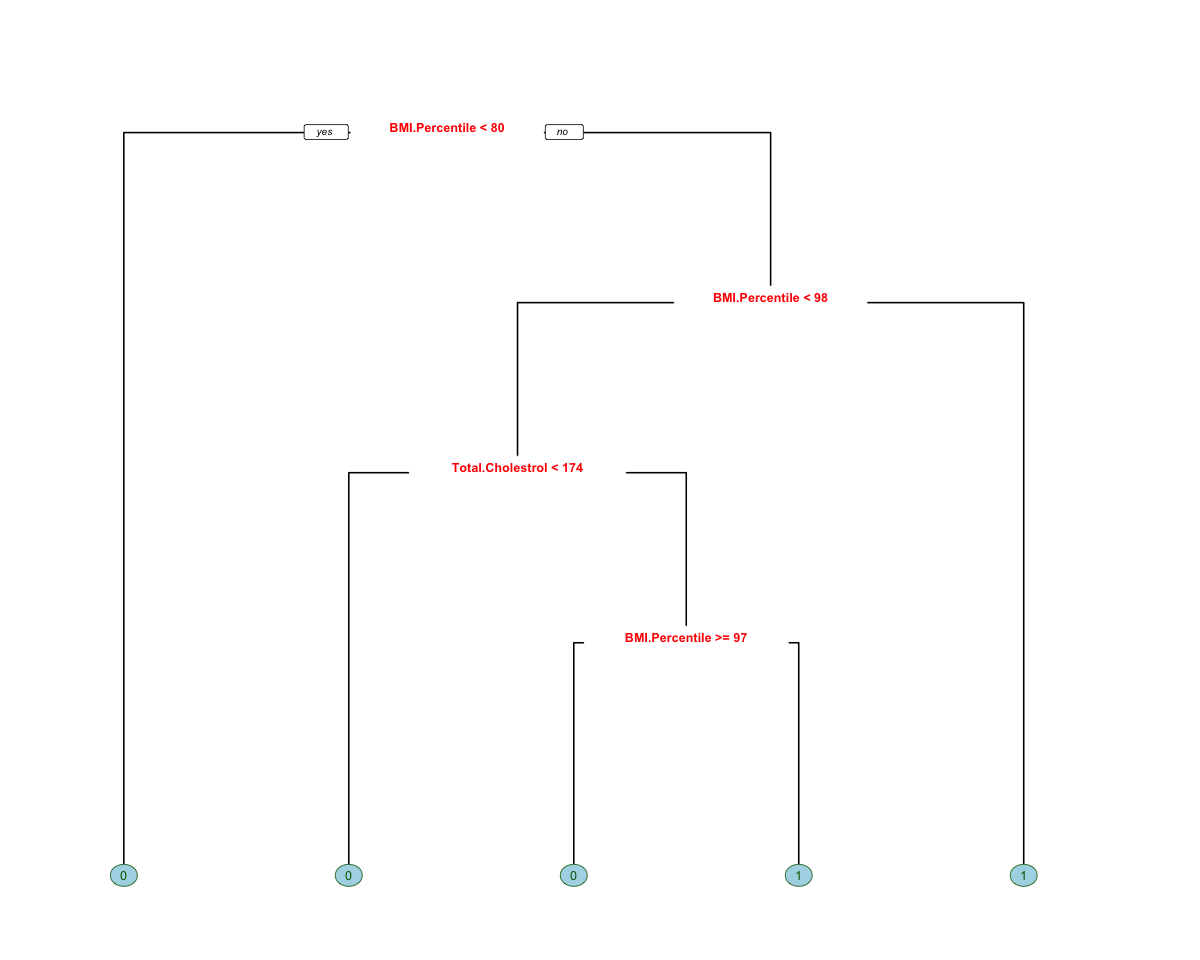

In [27]:
# Set the options for the plot size.
options(
    repr.plot.width=10,
    repr.plot.height=8)

# Set the background color to white
par(bg = "white")

prp(caret_model,                 # The DT model.
    type=0,                    # Type 0: draw each node as a box.
    extra=0,                   # Draw branch labels.
    varlen=0,                  # Control the width of variable labels.
    faclen=0,                  # Control the width of factor level labels.
    branch.lty=1,              # Set line type for branches.
    branch.lwd=2,              # Set line width for branches.
    cex=0.9,                   # Set overall size of text.
    tweak=0.7,                 # Adjust the position of node labels.
    box.col="lightblue",     # Set box color.
    col="darkgreen",         # Set text color.
    split.col="red",         # Set color for split points.
    fallen.leaves=TRUE,        # Draw leaves in line with branch.
)

Predict the patietns' Diabete status on the train set and add a feature explaining it to that.

In [28]:
# Make predictions on the training set using the logistic regression model.
train_predictions <- predict(
    caret_model,
    newdata=train_set[,variables],
    type="prob"
)

# Convert predicted probabilities to class predictions (binary outcome: "Yes" or "No").
train_predictions <- ifelse(train_predictions[,2] > threshold, 1, 0)

# Add the predicted classes to the training set as a new column "LogReg_Pred".
train_set["CARET_Pred"] = train_predictions

head(train_set, 5)

,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label,LogReg_Pred,CARET_Pred
,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>",<dbl>
1,31133,2,16,2,16.79,120,58,84,122,4.7,147,2,3.63,0,0,0,0,0
2,31148,2,16,1,18.28,106,42,91,69,5.0,126,2,11.17,0,0,0,0,0
3,31206,2,17,4,21.27,110,66,93,82,4.7,180,1,37.62,0,0,0,1,0
5,31237,1,12,3,32.01,120,50,103,111,4.9,175,1,89.14,0,1,1,1,1
7,31264,1,17,4,20.46,102,66,84,67,5.4,122,2,29.85,0,0,0,0,0


Check how the CARET model works on the train set.

In [29]:
# Create a confusion matrix.
conf_matrix <- confusionMatrix(
    factor(train_set$CARET_Pred),
    train_set$ADA.Biomarker.Label,
    positive="1"
)

# Display the confusion matrix.
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1291  423
         1  242  204
                                          
               Accuracy : 0.6921          
                 95% CI : (0.6722, 0.7116)
    No Information Rate : 0.7097          
    P-Value [Acc > NIR] : 0.9654          
                                          
                  Kappa : 0.1831          
                                          
 Mcnemar's Test P-Value : 2.95e-12        
                                          
            Sensitivity : 0.32536         
            Specificity : 0.84214         
         Pos Pred Value : 0.45740         
         Neg Pred Value : 0.75321         
             Prevalence : 0.29028         
         Detection Rate : 0.09444         
   Detection Prevalence : 0.20648         
      Balanced Accuracy : 0.58375         
                                          
       'Positive' Class : 1               
                        

Predict the patients' Diabete status on the test set and add a feature explaining it to that.

In [30]:
# Make predictions on the test set using the logistic regression model.
test_predictions <- predict(
    caret_model,
    newdata=test_set[,variables],
    type="prob"
)

# Convert predicted probabilities to class predictions (binary outcome: "Yes" or "No").
test_predictions <- ifelse(test_predictions[,2] > threshold, 1, 0)

# Add the predicted classes to the test set as a new column "LogReg_Pred".
test_set["CARET_Pred"] = test_predictions

head(test_set, 5)

,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label,LogReg_Pred,CARET_Pred
,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>",<dbl>
4,31211,2,17,1,23.27,108,72,79,96,5.4,178,2,54.30,0,0,0,0,0
6,31246,1,17,1,28.07,114,48,96,99,4.8,173,2,78.75,0,0,0,1,0
9,31271,1,14,3,27.80,122,66,95,125,5.1,205,2,77.58,0,0,0,1,0
13,31360,2,13,3,22.55,98,80,89,95,5.2,188,2,49.21,0,0,0,1,0
18,31378,2,19,3,27.38,112,68,99,146,5.7,187,1,76.01,0,1,0,1,0


Check how the CARET model works on the test set.

In [31]:
# Create a confusion matrix.
conf_matrix <- confusionMatrix(
    factor(test_set$CARET_Pred),
    test_set$ADA.Biomarker.Label,
    positive="1"
)

# Display the confusion matrix.
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 323 123
         1  60  34
                                         
               Accuracy : 0.6611         
                 95% CI : (0.6195, 0.701)
    No Information Rate : 0.7093         
    P-Value [Acc > NIR] : 0.9934         
                                         
                  Kappa : 0.0679         
                                         
 Mcnemar's Test P-Value : 4.58e-06       
                                         
            Sensitivity : 0.21656        
            Specificity : 0.84334        
         Pos Pred Value : 0.36170        
         Neg Pred Value : 0.72422        
             Prevalence : 0.29074        
         Detection Rate : 0.06296        
   Detection Prevalence : 0.17407        
      Balanced Accuracy : 0.52995        
                                         
       'Positive' Class : 1              
                                         

***
***
## **CARET Model Summary**

text

***
***

## 13. Define the Random Forest Model and Check Its Performance <a id = 13></a>

Fit the Random Forest model on the train set.

In [32]:
# Train a random forest model using the randomForest function.
rf_model <- randomForest(
    ADA.Biomarker.Label ~ .,
    data=train_set[,variables],
    ntree = 1000,
    importance = TRUE, 
    proximity = TRUE
)

summary(rf_model)

                Length  Class  Mode     
call                  6 -none- call     
type                  1 -none- character
predicted          2160 factor numeric  
err.rate           3000 -none- numeric  
confusion             6 -none- numeric  
votes              4320 matrix numeric  
oob.times          2160 -none- numeric  
classes               2 -none- character
importance           20 -none- numeric  
importanceSD         15 -none- numeric  
localImportance       0 -none- NULL     
proximity       4665600 -none- numeric  
ntree                 1 -none- numeric  
mtry                  1 -none- numeric  
forest               14 -none- list     
y                  2160 factor numeric  
test                  0 -none- NULL     
inbag                 0 -none- NULL     
terms                 3 terms  call     

Plot the performance of the model for the range of the trees number.

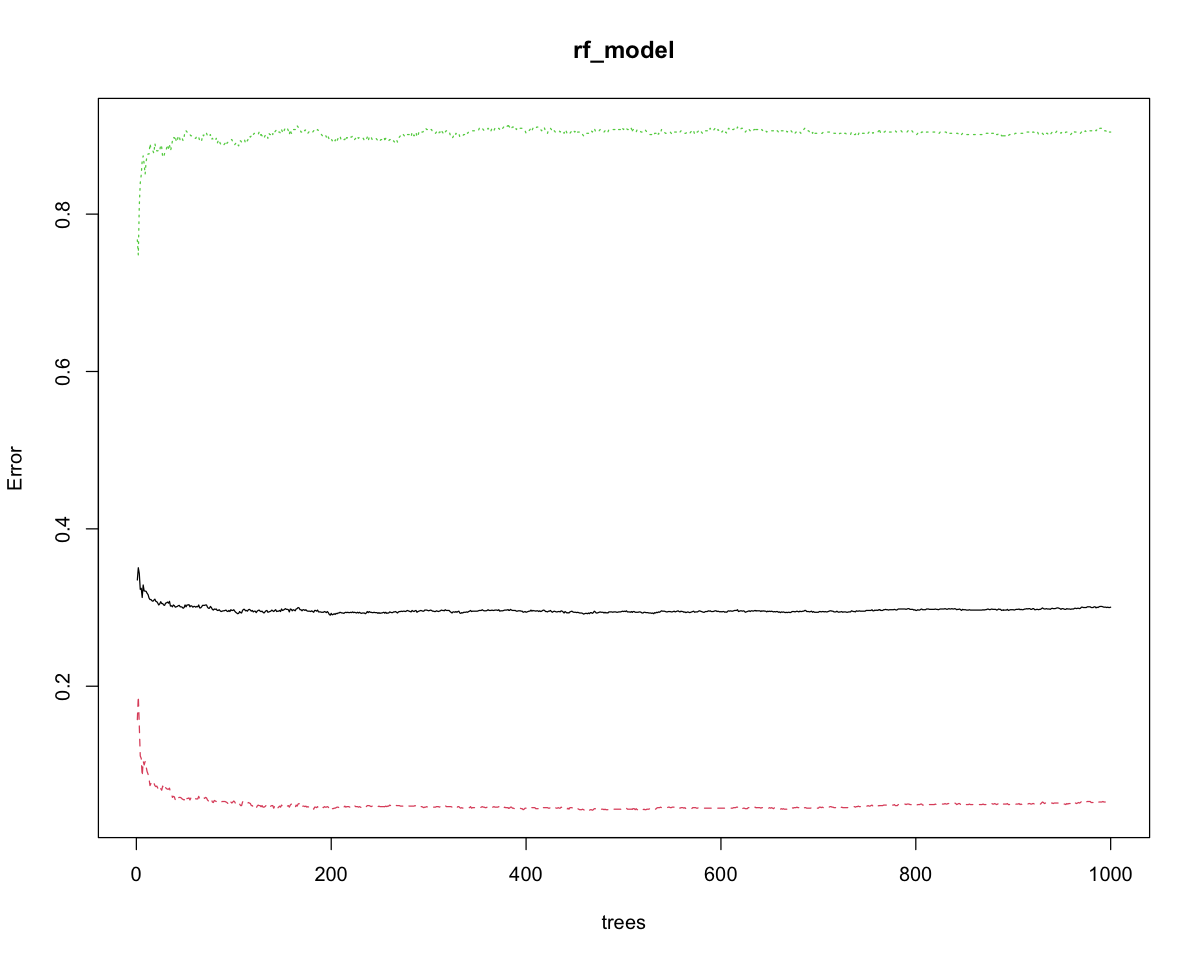

In [33]:
# Set the background color to white
par(bg = "white")

# Plotting model 
plot(rf_model) 

Evaluate how the different features impress the model's prefromance.

In [34]:
# Importance plot 
importance(rf_model)

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Race,0.7323879,6.534119,4.270050,36.46443
Total.Cholestrol,6.3891785,6.620144,8.817984,162.03144
Diabetes.Risk,-7.5781352,-3.216608,-8.493414,11.81714
BMI.Percentile,21.9819279,27.671169,32.738673,224.15790
Hypertension,-4.8401025,11.307209,3.821267,5.36607


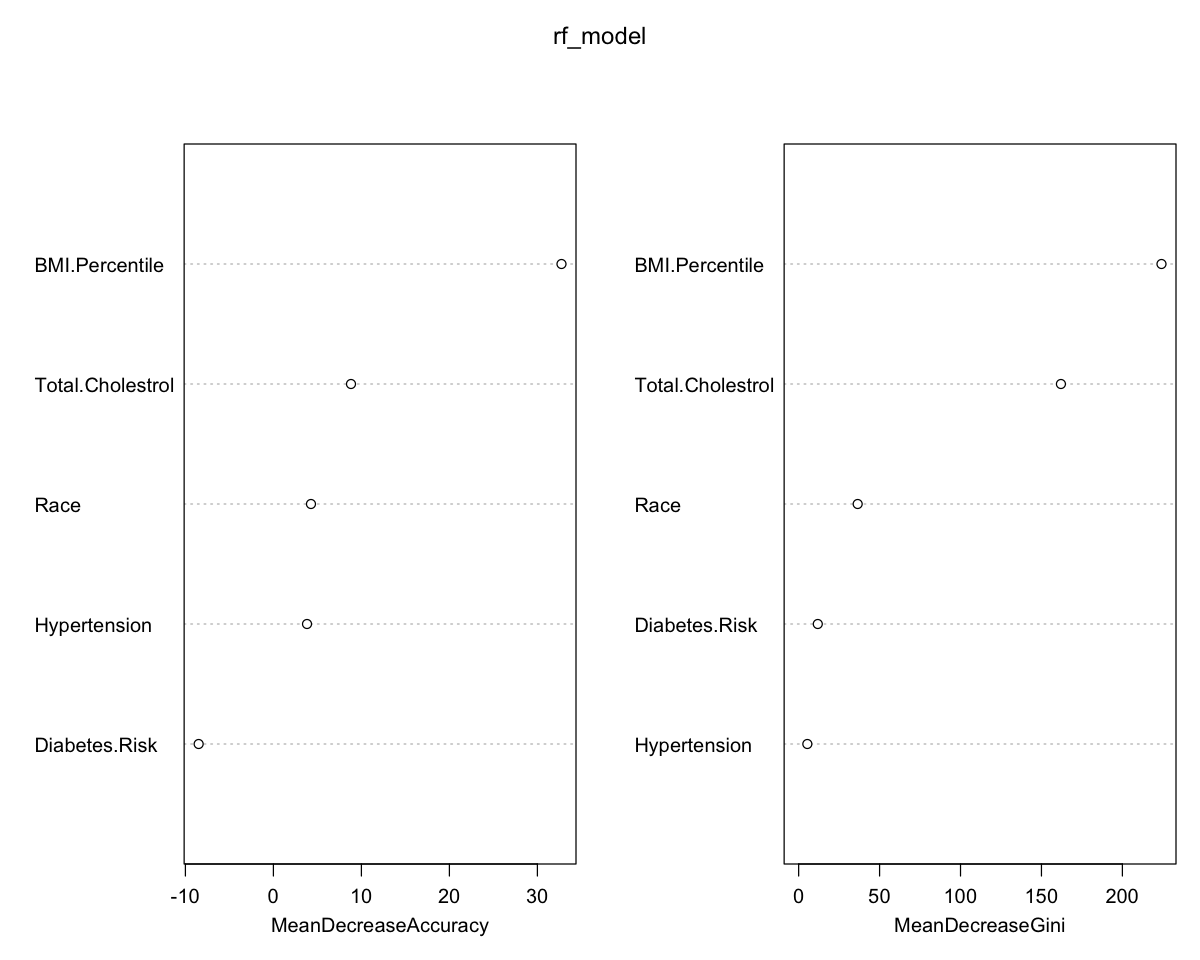

In [35]:
# Set the background color to white
par(bg = "white")

# Variable importance plot 
varImpPlot(rf_model) 

Predict the patients' Diabete status on the train set and add a feature explaining it to that.

In [36]:
# Make predictions on the training set using the logistic regression model.
train_predictions <- predict(
    rf_model,
    newdata=train_set[,variables],
    type="prob"
)

# Convert predicted probabilities to class predictions (binary outcome: "Yes" or "No").
train_predictions <- ifelse(train_predictions[,2] > threshold, 1, 0)

# Add the predicted classes to the training set as a new column "LogReg_Pred".
train_set["RF_Pred"] = train_predictions

head(train_set, 5)

,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label,LogReg_Pred,CARET_Pred,RF_Pred
,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>",<dbl>,<dbl>
1,31133,2,16,2,16.79,120,58,84,122,4.7,147,2,3.63,0,0,0,0,0,0
2,31148,2,16,1,18.28,106,42,91,69,5.0,126,2,11.17,0,0,0,0,0,0
3,31206,2,17,4,21.27,110,66,93,82,4.7,180,1,37.62,0,0,0,1,0,0
5,31237,1,12,3,32.01,120,50,103,111,4.9,175,1,89.14,0,1,1,1,1,1
7,31264,1,17,4,20.46,102,66,84,67,5.4,122,2,29.85,0,0,0,0,0,0


Check how the Random Forest model works on the train set.

In [37]:
# Create a confusion matrix.
conf_matrix <- confusionMatrix(
    factor(train_set$RF_Pred),
    train_set$ADA.Biomarker.Label,
    positive="1"
)

# Display the confusion matrix.
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1476  188
         1   57  439
                                          
               Accuracy : 0.8866          
                 95% CI : (0.8724, 0.8996)
    No Information Rate : 0.7097          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7066          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7002          
            Specificity : 0.9628          
         Pos Pred Value : 0.8851          
         Neg Pred Value : 0.8870          
             Prevalence : 0.2903          
         Detection Rate : 0.2032          
   Detection Prevalence : 0.2296          
      Balanced Accuracy : 0.8315          
                                          
       'Positive' Class : 1               
                        

Predict the patents' Diabete status on the test set and add a feature explaining it to that.

In [38]:
# Make predictions on the test set using the logistic regression model.
test_predictions <- predict(
    rf_model,
    newdata=test_set[,variables],
    type="prob"
)

# Convert predicted probabilities to class predictions (binary outcome: "Yes" or "No").
test_predictions <- ifelse(test_predictions[,2] > threshold, 1, 0)

# Add the predicted classes to the test set as a new column "LogReg_Pred".
test_set["RF_Pred"] = test_predictions

head(test_set, 5)

,ID,Gender,Age,Race,BMI,Systolic.BP,Diastolic.BP,FPG,X2hrPG,HbA1c,Total.Cholestrol,Diabetes.Risk,BMI.Percentile,Hypertension,ADA.Biomarker.Label,ADA.Screening.Label,LogReg_Pred,CARET_Pred,RF_Pred
,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,"<dbl[,1]>",<dbl>,<dbl>
4,31211,2,17,1,23.27,108,72,79,96,5.4,178,2,54.30,0,0,0,0,0,0
6,31246,1,17,1,28.07,114,48,96,99,4.8,173,2,78.75,0,0,0,1,0,0
9,31271,1,14,3,27.80,122,66,95,125,5.1,205,2,77.58,0,0,0,1,0,0
13,31360,2,13,3,22.55,98,80,89,95,5.2,188,2,49.21,0,0,0,1,0,0
18,31378,2,19,3,27.38,112,68,99,146,5.7,187,1,76.01,0,1,0,1,0,1


Check how the Random Forest model works on the test set.

In [39]:
# Create a confusion matrix.
conf_matrix <- confusionMatrix(
    factor(test_set$RF_Pred),
    test_set$ADA.Biomarker.Label,
    positive="1"
)

# Display the confusion matrix.
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 319 117
         1  64  40
                                          
               Accuracy : 0.6648          
                 95% CI : (0.6233, 0.7046)
    No Information Rate : 0.7093          
    P-Value [Acc > NIR] : 0.989144        
                                          
                  Kappa : 0.0974          
                                          
 Mcnemar's Test P-Value : 0.000111        
                                          
            Sensitivity : 0.25478         
            Specificity : 0.83290         
         Pos Pred Value : 0.38462         
         Neg Pred Value : 0.73165         
             Prevalence : 0.29074         
         Detection Rate : 0.07407         
   Detection Prevalence : 0.19259         
      Balanced Accuracy : 0.54384         
                                          
       'Positive' Class : 1               
                              

***
***
## **Random Rorest Model Summary**

Text

***
***

[Project Content](#0)